In [26]:
import boto3
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
heart = pd.read_csv(file_content_stream)
heart = heart.dropna()
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [27]:
## Defining the input and target variables
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Building the logisitic model
logit_md = LogisticRegression().fit(X_train, Y_train)

## Predicting on the test dataset
preds = logit_md.predict_proba(X_test)[:, 1]
preds

array([0.3852795 , 0.10112458, 0.32327456, 0.10194262, 0.3861919 ,
       0.02913752, 0.02856498, 0.12038662, 0.18199527, 0.23079293,
       0.17207963, 0.03090961, 0.05332045, 0.1203901 , 0.12703634,
       0.39099633, 0.08635167, 0.32723933, 0.18294546, 0.02870617,
       0.38451275, 0.18581517, 0.0570808 , 0.17510197, 0.03538788,
       0.22063267, 0.15460652, 0.35381183, 0.14546817, 0.06979739,
       0.28207553, 0.11363387, 0.13906528, 0.34184229, 0.05944892,
       0.12792977, 0.12164339, 0.26215742, 0.33267485, 0.19125285,
       0.37215304, 0.11556983, 0.13977395, 0.19912165, 0.14686656,
       0.07131181, 0.18337502, 0.09450503, 0.09960583, 0.26881362,
       0.29365425, 0.09026953, 0.07288958, 0.08274102, 0.29449556,
       0.14783956, 0.24757454, 0.04786694, 0.23209007, 0.12917075,
       0.12297354, 0.13613936, 0.16190399, 0.14282271, 0.10043451,
       0.08236973, 0.11348594, 0.3417492 , 0.28969106, 0.13283112,
       0.12477534, 0.21536553, 0.1590691 , 0.10249272, 0.09097

In [28]:
False_Positive_Rate, True_Positive_Rate, cutoffs = roc_curve(Y_test, preds)

In [31]:
a = pd.DataFrame({'FPR': False_Positive_Rate, 'TPR': True_Positive_Rate, 'cutoff': cutoffs})
a.head()

,FPR,TPR,cutoff
0,0.000000,0.000000,1.517897
1,0.001605,0.000000,0.517897
2,0.003210,0.000000,0.490558
3,0.003210,0.009174,0.484568
4,0.008026,0.009174,0.463461


In [37]:
a.describe()

,FPR,TPR,cutoff
count,183.000000,183.000000,183.000000
mean,0.374146,0.529804,0.197514
std,0.287862,0.303998,0.150622
min,0.000000,0.000000,0.020338
25%,0.112360,0.256881,0.099828
50%,0.306581,0.568807,0.166918
75%,0.584270,0.793578,0.281361
max,1.000000,1.000000,1.517897


In [38]:
a[(a['cutoff'] >= 0.23) & (a['cutoff'] <= 0.26)]

,FPR,TPR,cutoff
51,0.138042,0.311927,0.259559
52,0.162119,0.311927,0.246556
53,0.162119,0.321101,0.245347
54,0.178170,0.321101,0.238286
55,0.178170,0.339450,0.236748
56,0.179775,0.339450,0.235978
57,0.179775,0.348624,0.235936
58,0.182986,0.348624,0.235041
59,0.182986,0.357798,0.234656
60,0.184591,0.357798,0.233074


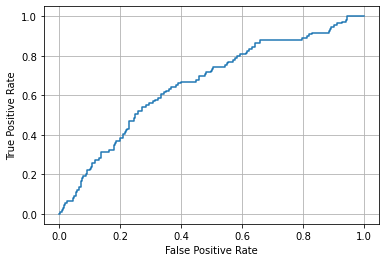

In [29]:
import matplotlib.pyplot as plt

plt.plot(False_Positive_Rate, True_Positive_Rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

In [30]:
np.argmax(True_Positive_Rate - False_Positive_Rate)

105

In [33]:
a.loc[105]

FPR       0.367576
TPR       0.642202
cutoff    0.145848
Name: 105, dtype: float64

In [35]:
v = np.where(preds < 0.25, 0, 1)

confusion_matrix(Y_test, v)

array([[529,  94],
       [ 75,  34]])

In [24]:
545 / (545 + 56)

0.9068219633943427

In [36]:
z = np.where(preds < 0.15, 0, 1)

confusion_matrix(Y_test, z)

array([[402, 221],
       [ 41,  68]])